In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from ipywidgets import interact

### Datos

In [15]:
campo1 = np.genfromtxt("data1.csv", usecols= 4)
campo2 = np.genfromtxt("data2.csv", usecols= 4, skip_header=44)
campo3 = np.genfromtxt("data3.csv", usecols= 4)
campo4 = np.genfromtxt("data4.csv", usecols= 4)
campo5 = np.genfromtxt("data5.csv", usecols= 4)
campo6 = np.genfromtxt("data6.csv", usecols= 4)
campo7 = np.genfromtxt("data7.csv", usecols= 4)
campo8 = np.genfromtxt("data8.csv", usecols= 4)
campo9 = np.genfromtxt("data9.csv", usecols= 4)
campo10 = np.genfromtxt("data10.csv", usecols= 4)

list_campos = [campo1, campo2, campo3, campo4, campo5, campo6, campo7, campo8, campo9, campo10]


temp = np.genfromtxt("temp.txt") # temperatura

In [29]:

# Calculamos la desviación estándar de cada campo(archivo) y luego, guardamos los resultados en una lista.
list_desv = []
for i in list_campos:
    list_desv.append(round(np.std(i), 3)) # Usamos np.std para obtener el error para cada campo magnético.

Realizamos un gráfico: Promedio campo magnético vs temperatura

Text(0, 0.5, 'Promedio campo magnético')

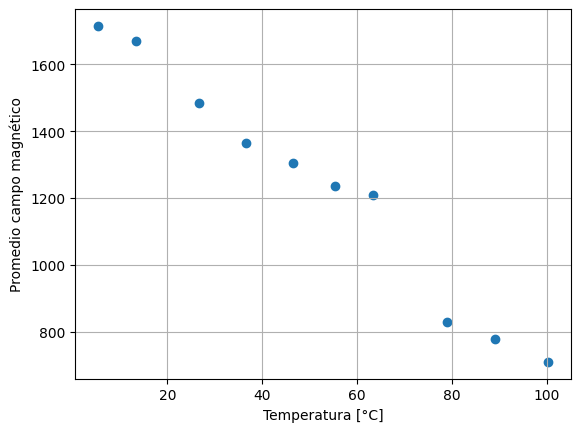

In [26]:
plt.grid(True)
plt.scatter(temp, list_promd)
plt.xlabel("Temperatura [°C]")
plt.ylabel("Promedio campo magnético")

## Primer Ajuste

Ahora, debemos ajustar los datos a una curva. \
Para ello, usaremos la siguiente función: \
$ f(x) = A e^{-Bx}$

In [27]:
def f(x,A,B):
    return A*np.exp(-B*x)

- Cálculo de coef. óptimos \
A continuación, calcularemos los coef. óptimos para el ajuste.

In [28]:
A_opt, B_opt = curve_fit(f, temp,list_promd, sigma=list_desv)[0]

C:\Users\martina\AppData\Local\Temp\ipykernel_4688\3585304163.py:2: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-B*x)


Luego, la gráfica del ajuste junto con su error nos queda:

C:\Users\martina\AppData\Local\Temp\ipykernel_4688\396213804.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ob" (-> color='b'). The keyword argument will take precedence.
  plt.errorbar(temp, list_promd, xerr = 0.05, yerr= list_desv, color="red", label= "Datos ",  fmt="ob",capsize=7)


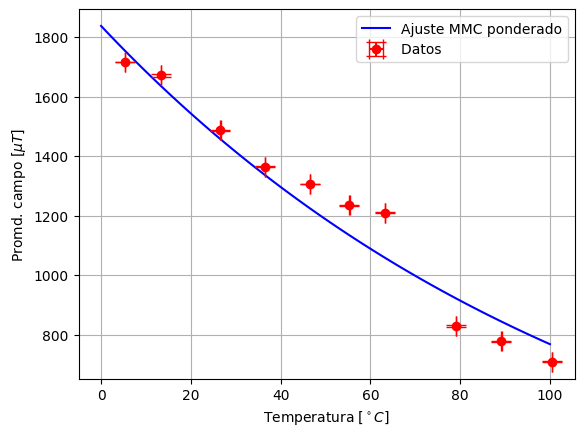

In [31]:
xx = np.linspace(0,100,100) # Nos permite agregar más números al intervalo original de temperatura.
A = A_opt
B = B_opt

plt.plot(xx,  f(xx, A, B), color="blue" ,label='Ajuste MMC ponderado')  
plt.errorbar(temp, list_promd, xerr = 0.05, yerr= list_desv, color="red", label= "Datos ",  fmt="ob",capsize=7) 


plt.xlabel('Temperatura [$^\circ C$]')
plt.ylabel('Promd. campo [$\mu T$]')
plt.grid(True)
plt.legend()

- Calcular: error de los parámetros \
Notemos que, existe un error al calcular los parámetros del ajuste. 

In [33]:
Parametros, matriz = curve_fit(f, temp, list_promd,absolute_sigma=True) 
Aerr,Berr=np.sqrt(np.diagonal(matriz))
print(Aerr)
print(Berr)

0.771631327310015
9.015250181282882e-06


C:\Users\martina\AppData\Local\Temp\ipykernel_4688\3585304163.py:2: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-B*x)


#### Residuos del primer ajuste

coef. de posicion=  0.9477815031705025


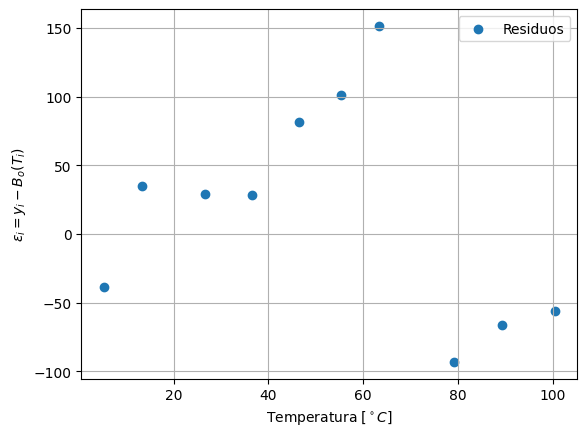

In [35]:
St=np.sum(((list_promd-np.mean(list_promd))**2))

res=(list_promd-A*np.exp(-B*temp))
Sr=np.sum((res)**2)
r2=(St-Sr)/St
print("coef. de posicion= ", r2)

plt.scatter(temp,res, label="Residuos")

plt.xlabel("Temperatura $[^\circ C]$")
plt.ylabel("$\epsilon_i=y_i-B_o(T_i)$")
plt.legend()
plt.grid(True)

- Residuos normalizados

coef. de posicion=  0.9767507657359948


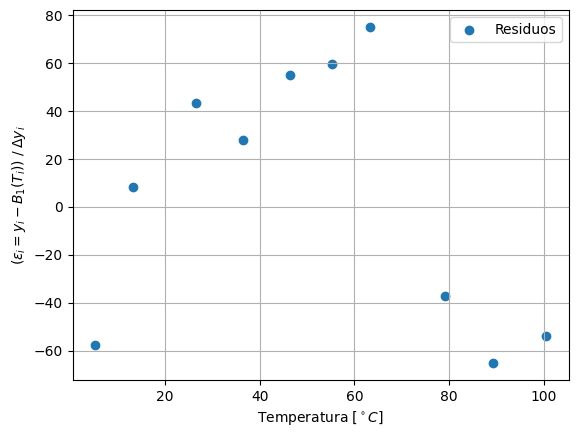

In [36]:
St=np.sum(((list_promd-np.mean(list_promd))**2))

res=(list_promd-A*np.exp(-B*temp))/list_desv
Sr=np.sum((res)**2)
r2=(St-Sr)/St
print("coef. de posicion= ", r2)

plt.scatter(temp,res,label="Residuos")

plt.xlabel("Temperatura $[^\circ C]$")
plt.ylabel("$(\epsilon_i=y_i-B_1(T_i))\; /\; \Delta y_i$")
plt.legend()
plt.grid(True)
# Qué quiere decir normalizados, es lo que debe hacerce siempre?

## Segundo Ajuste

Usaremos la siguiente función: \
$f(x) = A_0 + A_1 x$

- Calculo de coef. óptimos

In [39]:
A_1, A_0= np.polyfit(temp,list_promd, 1,w= 1/np.array(list_desv))

C:\Users\martina\AppData\Local\Temp\ipykernel_4688\4004302539.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ob" (-> color='b'). The keyword argument will take precedence.
  plt.errorbar(temp, list_promd, xerr = 0.05, yerr= list_desv, color = "red",  label ='datos',  fmt="ob", capsize=7)


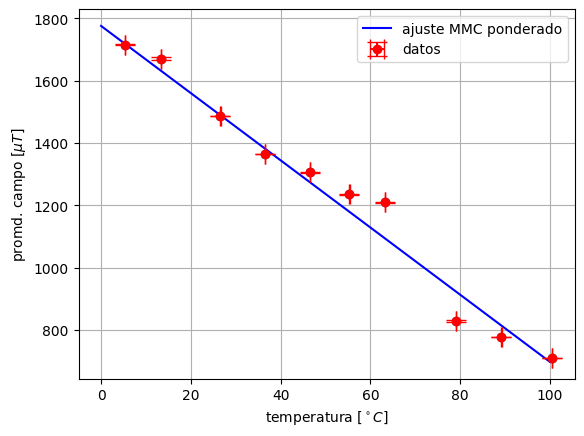

In [40]:
xx = np.linspace(0,100,100) # Agregamos más numéros al intervalo de temperatura.
A = A_opt
B = B_opt

plt.plot(xx, A_0+ A_1*xx , color='blue', label='ajuste MMC ponderado')   
plt.scatter(temp, list_promd)
plt.errorbar(temp, list_promd, xerr = 0.05, yerr= list_desv, color = "red",  label ='datos',  fmt="ob", capsize=7)
plt.xlabel('temperatura [$^\circ C$]')
plt.ylabel('promd. campo [$\mu T$]')
plt.legend()
plt.grid(True)

- Calculo: error de parámetros

In [41]:
Parametros2,matriz=np.polyfit(temp,list_promd,1,w=1/np.array(list_desv),cov="unscaled")
sigma_a1,sigma_a0=np.sqrt(np.diagonal(matriz))
print(sigma_a0)
print(sigma_a1)

0.5488837216602614
0.010355821571236264


#### Residuos del segundo ajuste

coef. de posicion=  0.974104141323287


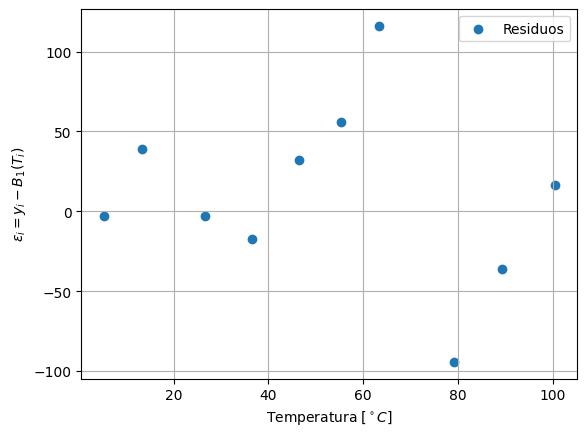

In [42]:
St=np.sum(((list_promd-np.mean(list_promd))**2))

res=list_promd-A_1*temp-A_0
Sr=np.sum((res)**2)
r2=(St-Sr)/St
print("coef. de posicion= ", r2)

plt.scatter(temp,res,label="Residuos")
plt.xlabel("Temperatura $[^\circ C]$")
plt.ylabel("$\epsilon_i=y_i-B_1(T_i)$")
plt.legend()
plt.grid(True)



- Residuos normalizados


coef. de posicion=  0.9928566303944097


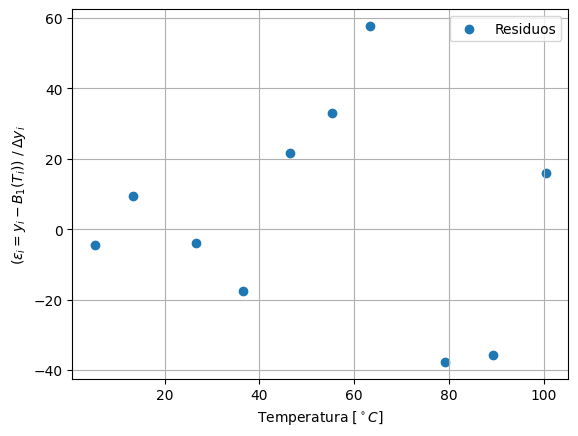

In [44]:
St=np.sum(((list_promd-np.mean(list_promd))**2))

res=(list_promd-A_1*temp-A_0)/list_desv
Sr=np.sum((res)**2)
r2=(St-Sr)/St
print("coef. de posicion= ", r2)

plt.scatter(temp,res,label="Residuos")
plt.xlabel("Temperatura $[^\circ C]$")
plt.ylabel("$(\epsilon_i=y_i-B_1(T_i))\; /\; \Delta y_i$")
plt.grid(True)
plt.legend()
plt.savefig("Residuos_recta_normalizados.pdf")